# Task-4 Decision Tree(LGMVIP)

## By:G.Satwika

***importing necessary libraries***

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

***importing data set***

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
data.shape

(150, 5)

In [5]:
data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

***replacing all the names in species with with numbers***

In [6]:
data.replace('Iris-setosa',0,inplace=True)
data.replace('Iris-virginica',1,inplace=True)
data.replace('Iris-versicolor',2,inplace=True)

In [7]:
data['species'].unique()

array([0, 2, 1], dtype=int64)

***checking for null values***

In [8]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

***visualizing iris data***

Text(0.5, 1.0, 'scatter')

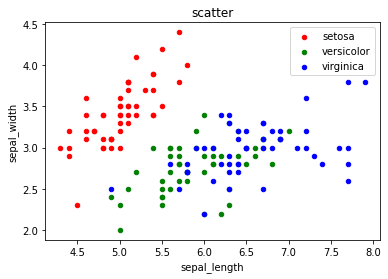

In [9]:
#this is the scatter plot for sepal length and width
ax = data[data.species==0].plot.scatter(x='sepal_length', y='sepal_width', 
                                                    color='red', label='setosa')
data[data.species==2].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='green', label='versicolor', ax=ax)
data[data.species==1].plot.scatter(x='sepal_length', y='sepal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

Text(0.5, 1.0, 'scatter')

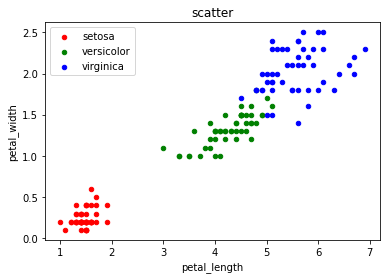

In [10]:
#this is the scatter plot for petal length and width
ax = data[data.species==0].plot.scatter(x='petal_length', y='petal_width', 
                                                    color='red', label='setosa')
data[data.species==2].plot.scatter(x='petal_length', y='petal_width', 
                                                color='green', label='versicolor', ax=ax)
data[data.species==1].plot.scatter(x='petal_length', y='petal_width', 
                                                color='blue', label='virginica', ax=ax)
ax.set_title("scatter")

***splitting the data into data and labels***

In [11]:
X=data.drop('species',axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
Y=data['species']
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    1
146    1
147    1
148    1
149    1
Name: species, Length: 150, dtype: int64

***splitting into training and testing data***

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
 X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [15]:
len(X_train)

120

In [16]:
len(X_test)

30

***training the model***

In [17]:
from sklearn.tree import DecisionTreeClassifier 

In [19]:
dt=DecisionTreeClassifier()

In [20]:
#By default gini index is used and the max-depth is not specified so it will split till we get pure nodes.
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [22]:
dt.score(X_test,y_test)

0.9666666666666667

***Text Representation of decision tree***

In [24]:
from sklearn import tree
text = tree.export_text(dt)
print(text)

|--- feature_2 <= 2.35
|   |--- class: 0
|--- feature_2 >  2.35
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 4.95
|   |   |   |--- feature_3 <= 1.65
|   |   |   |   |--- class: 2
|   |   |   |--- feature_3 >  1.65
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.95
|   |   |   |--- feature_3 <= 1.55
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  1.55
|   |   |   |   |--- feature_0 <= 6.95
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  6.95
|   |   |   |   |   |--- class: 1
|   |--- feature_3 >  1.75
|   |   |--- class: 1



***Plotting the tree***

In [31]:
feature_n=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
target_n= ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

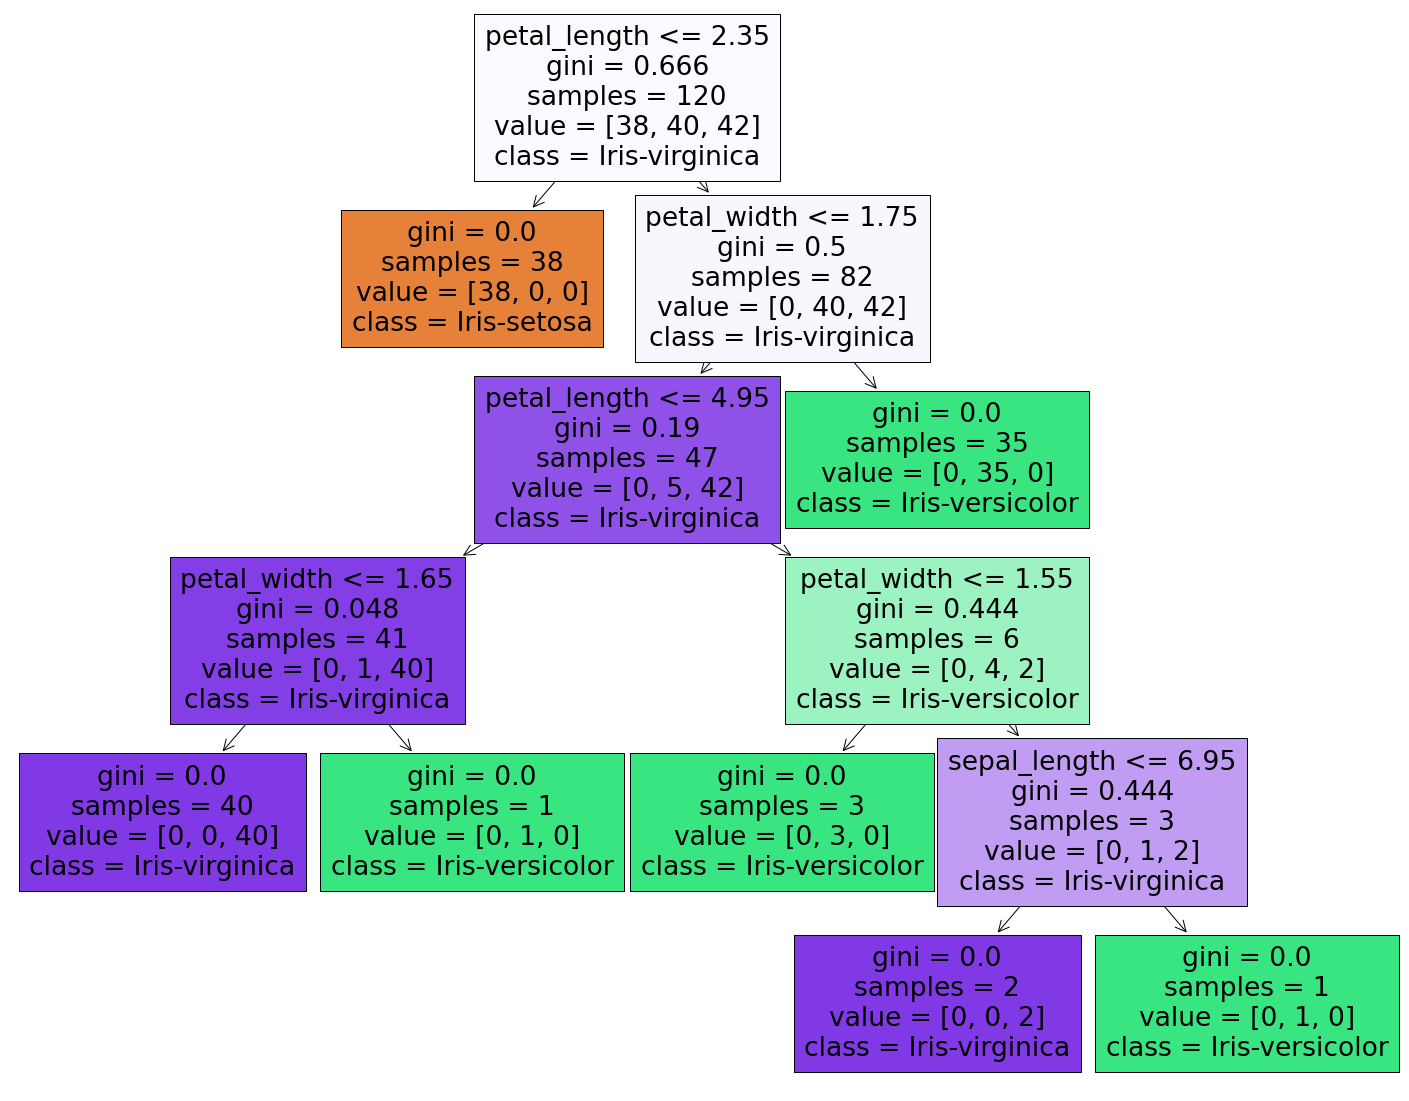

In [32]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt, 
                   feature_names=feature_n,  
                   class_names=target_n,
                   filled=True)

***printing accuracy matrix***

In [34]:
actual=y_test
predict=dt.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix

In [36]:
confusion_matrix(actual,predict)

array([[12,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  7]], dtype=int64)

***classification report***

In [37]:
from sklearn.metrics import classification_report
print(classification_report(actual,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      1.00      0.95        10
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



***Making a prediction model***

In [38]:
print("enter details")
sepal_length=float(input("sepal_length : "))
sepal_width=float(input("sepal_width : "))
petal_length=float(input("petal_length : "))
petal_width=float(input("petal_width : "))
new_data=np.array([[sepal_length,sepal_width,petal_length,petal_width]])

enter details
sepal_length : 5.0
sepal_width : 3.6
petal_length : 1.4
petal_width : 0.2


In [39]:
ans=dt.predict(new_data)
if(ans==0):
    print("Iris_setosa")
elif(ans==1):
    print("Iris virginica")
else:
    print("Iris versicolor")

Iris_setosa


c:\python\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


Thus, by using the Decision Tree in iris dataset we are getting a accuracy score nearly 97%.